In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


/kaggle/input/sbistocks/sbi.csv
/kaggle/input/reliancestocks/rel.csv
/kaggle/input/nse-dataset-analyctis/NSE-TATAGLOBAL11.csv


In [38]:
import pandas as pd
from pandas import Series,DataFrame 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [39]:
from datetime import datetime
from datetime import date

In [40]:
data = pd.read_csv("../input/reliancestocks/rel.csv")

In [41]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1998-03-20,175.35,178.25,173.75,NaN,NaN,NaN,NaN
1,1998-03-23,178.50,181.00,178.50,180.20,180.20,1758700.0,3165.37
2,1998-03-24,184.00,184.90,177.50,178.00,178.70,8838650.0,15951.78
3,1998-03-25,181.50,184.60,179.00,183.50,183.85,8936250.0,16292.18
4,1998-03-26,183.85,184.25,178.75,179.25,179.45,6915150.0,12542.00


In [42]:
data.shape

(5184, 8)

In [45]:
df1 = data
df1['Date'] = pd.to_datetime(df1.Date,format='%Y-%m-%d')
df1.index = df1['Date']
df1 = df1.sort_index(ascending=True, axis=0)

In [46]:
df1.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
1998-03-20,1998-03-20,175.35,178.25,173.75,NaN,NaN,NaN,NaN
1998-03-23,1998-03-23,178.50,181.00,178.50,180.20,180.20,1758700.0,3165.37
1998-03-24,1998-03-24,184.00,184.90,177.50,178.00,178.70,8838650.0,15951.78
1998-03-25,1998-03-25,181.50,184.60,179.00,183.50,183.85,8936250.0,16292.18
1998-03-26,1998-03-26,183.85,184.25,178.75,179.25,179.45,6915150.0,12542.00


In [55]:
rel12 = df1[data.index.year == 2012]
rel13 = df1[data.index.year == 2013]
rel14 = df1[data.index.year == 2014]
rel15 = df1[data.index.year == 2015]
rel16 = df1[data.index.year == 2016]

In [56]:
frame = [rel12,rel13,rel14,rel15,rel16]

In [57]:
reliance = pd.concat(frame)

In [58]:
reliance.shape

(1240, 8)

In [59]:
reliance.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2012-01-02,2012-01-02,696.80,709.75,687.15,707.10,706.55,4299217.0,30031.73
2012-01-03,2012-01-03,712.25,726.90,710.35,723.55,724.65,4683491.0,33694.19
2012-01-04,2012-01-04,727.40,730.95,713.35,714.80,716.15,4238367.0,30577.54
2012-01-05,2012-01-05,715.00,724.95,694.10,702.00,699.50,6619586.0,46967.16
2012-01-06,2012-01-06,697.05,724.00,696.65,718.15,717.55,4703147.0,33418.33


<Figure size 1152x576 with 0 Axes>

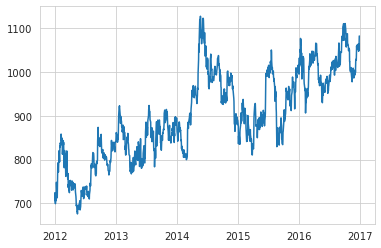

<Figure size 1152x576 with 0 Axes>

In [60]:
plt.plot(reliance['Close'], label = 'Close price history')
plt.figure(figsize=(16,8))

In [ ]:
##Moving Average

# **moving average model**

In [61]:
dataset = DataFrame()

In [62]:
dataset['Close'] = reliance['Close']

In [63]:
dataset.head()

,Close
Date,
2012-01-02,706.55
2012-01-03,724.65
2012-01-04,716.15
2012-01-05,699.50
2012-01-06,717.55


In [64]:
dataset.describe()

,Close
count,1240.000000
mean,900.291774
std,100.253680
min,676.100000
25%,827.787500
50%,888.475000
75%,987.312500
max,1127.450000


In [65]:
dataset.shape

(1240, 1)

In [69]:
df1 = reliance
df1['Date'] = pd.to_datetime(df1.Date,format='%Y-%m-%d')
df1.index = df1['Date']
df1 = df1.sort_index(ascending=True, axis=0)

In [70]:
new_data = pd.DataFrame(index=range(0,len(df1)),columns=['Date', 'Close'])

In [71]:
for i in range(0, len(df1)):
    new_data['Date'][i] = df1['Date'][i]
    new_data['Close'][i] = df1['Close'][i]

In [72]:
new_data.head()

,Date,Close
0,2012-01-02 00:00:00,706.55
1,2012-01-03 00:00:00,724.65
2,2012-01-04 00:00:00,716.15
3,2012-01-05 00:00:00,699.5
4,2012-01-06 00:00:00,717.55


In [73]:
train = new_data[:987]
valid = new_data[987:]

In [74]:
train.shape

(987, 2)

In [77]:
valid.shape

(253, 2)

In [75]:
train.head()

,Date,Close
0,2012-01-02 00:00:00,706.55
1,2012-01-03 00:00:00,724.65
2,2012-01-04 00:00:00,716.15
3,2012-01-05 00:00:00,699.5
4,2012-01-06 00:00:00,717.55


In [76]:
preds = []

In [78]:
for i in range(0, valid.shape[0]):
    a = train['Close'][len(train)-253+i:].sum() + sum(preds)
    b = a/253
    preds.append(b)

In [79]:
rms = np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))

In [81]:
rms

98.98203755156715

In [82]:
valid.head()

,Date,Close
987,2015-12-23 00:00:00,1003.8
988,2015-12-24 00:00:00,1000.55
989,2015-12-28 00:00:00,1010.4
990,2015-12-29 00:00:00,1015.4
991,2015-12-30 00:00:00,1004.5


In [83]:
valid['predections'] = 0
valid['predections'] = preds

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
valid.head()

,Date,Close,predections
987,2015-12-23 00:00:00,1003.8,912.112451
988,2015-12-24 00:00:00,1000.55,912.300247
989,2015-12-28 00:00:00,1010.4,912.469418
990,2015-12-29 00:00:00,1015.4,912.597360
991,2015-12-30 00:00:00,1004.5,912.644978


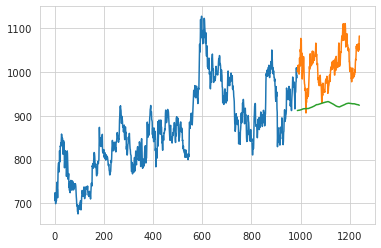

In [87]:
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predections']])

green line in prediction corresponding to original data (orange)

# **Long Short Term Memory (LSTM)**

In [96]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [97]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [98]:
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

In [99]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [100]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [101]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [102]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [103]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 39s - loss: 0.0068


In [104]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)


In [105]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [106]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [107]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

24.357025140183122

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


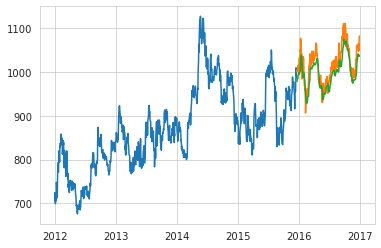

In [108]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

# **Prophet**

In [110]:
from fbprophet import Prophet

In [115]:
new_data = pd.DataFrame(index=range(0,len(df1)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

In [116]:
#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

In [117]:
new_data.head()

,ds,y
Date,,
1998-03-20,1998-03-20,NaN
1998-03-23,1998-03-23,180.2
1998-03-24,1998-03-24,178.7
1998-03-25,1998-03-25,183.85
1998-03-26,1998-03-26,179.45


In [118]:
train = new_data[:987]
valid = new_data[987:]

In [119]:
#fit the model
model = Prophet()
model.fit(train)

In [120]:
#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)


In [121]:
#rmse
forecast_valid = forecast['yhat'][987:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

47.759176933870364

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



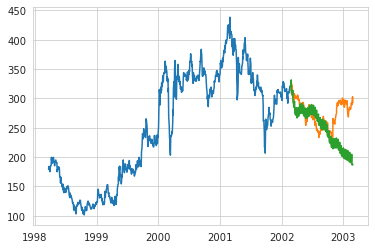

In [124]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])